In [10]:
setwd("GWA/projects/validation/mlstComparison/distancesComparison/salm")

ERROR: Error in setwd("GWA/projects/validation/mlstComparison/distancesComparison/lmo"): cannot change working directory


In [1]:
chewbbaca <- read.csv("distances.chewbbaca.enterobase.tsv.gz", sep="\t")
bn <- read.csv("distances.bn.tsv.gz", sep="\t")
etoki <- read.csv("distances.etoki.tsv.gz", sep="\t")
colorid <- read.csv("distances.colorid.salm.tsv.gz", sep="\t")

# add a key for merging later
bn$key <- paste(bn$sample1, bn$sample2, sep="")
etoki$key <- gsub(".fasta", "", gsub("_1.shovillSpades", "", paste(basename(etoki$fasta1), basename(etoki$fasta2), sep="")))
chewbbaca$key <- gsub("_1.shovillSpades.fasta","",paste(chewbbaca$sample1,chewbbaca$sample2, sep=""))
colorid$key <- paste(colorid$sample1,colorid$sample2, sep="")

# make each spreadsheet have distinct columns
colnames(chewbbaca) <- c("sample1.chewbbaca","sample2.chewbbaca","identity.chewbbaca", "numSame.chewbbaca", "numCompared.chewbbaca","key")
colnames(colorid) <- c("sample1.colorid","sample2.colorid","identity.colorid", "numSame.colorid", "numCompared.colorid","key")
colnames(bn) <- c("SRR1", "SRR2", "identity.bn", "numSame.bn", "numCompared.bn", "key")
colnames(etoki) <- c("sample1.etoki", "sample2.etoki", "identity.etoki", "numSame.etoki", "numCompared.etoki", "key")

In [2]:
head(chewbbaca)
head(bn)
head(etoki)
head(colorid)

,sample1.chewbbaca,sample2.chewbbaca,identity.chewbbaca,numSame.chewbbaca,numCompared.chewbbaca,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,SRR10037034_1.shovillSpades.fasta,SRR10037035_1.shovillSpades.fasta,0.9785384,3602,3681,SRR10037034SRR10037035
2,SRR10037034_1.shovillSpades.fasta,SRR10037036_1.shovillSpades.fasta,0.9829592,3634,3697,SRR10037034SRR10037036
3,SRR10037034_1.shovillSpades.fasta,SRR10037037_1.shovillSpades.fasta,0.9826276,3620,3684,SRR10037034SRR10037037
4,SRR10037034_1.shovillSpades.fasta,SRR10037038_1.shovillSpades.fasta,0.9826558,3626,3690,SRR10037034SRR10037038
5,SRR10037034_1.shovillSpades.fasta,SRR10037039_1.shovillSpades.fasta,0.9618633,3531,3671,SRR10037034SRR10037039
6,SRR10037034_1.shovillSpades.fasta,SRR10037040_1.shovillSpades.fasta,0.9867568,3651,3700,SRR10037034SRR10037040


,SRR1,SRR2,identity.bn,numSame.bn,numCompared.bn,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,SRR10037034,SRR10037035,0.9925426,2795,2816,SRR10037034SRR10037035
2,SRR10037034,SRR10037036,0.9923050,2837,2859,SRR10037034SRR10037036
3,SRR10037034,SRR10037037,0.9913194,2855,2880,SRR10037034SRR10037037
4,SRR10037034,SRR10037038,0.9916667,2856,2880,SRR10037034SRR10037038
5,SRR10037034,SRR10037039,0.9922766,2698,2719,SRR10037034SRR10037039
6,SRR10037034,SRR10037040,0.9917156,2873,2897,SRR10037034SRR10037040


,sample1.etoki,sample2.etoki,identity.etoki,numSame.etoki,numCompared.etoki,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,SRR10037034_1.shovillSpades,SRR10037035_1.shovillSpades,0.98,2893,2946,SRR10037034SRR10037035
2,SRR10037034_1.shovillSpades,SRR10037036_1.shovillSpades,0.99,2910,2951,SRR10037034SRR10037036
3,SRR10037034_1.shovillSpades,SRR10037037_1.shovillSpades,0.98,2908,2953,SRR10037034SRR10037037
4,SRR10037034_1.shovillSpades,SRR10037038_1.shovillSpades,0.99,2911,2952,SRR10037034SRR10037038
5,SRR10037034_1.shovillSpades,SRR10037039_1.shovillSpades,0.96,2831,2943,SRR10037034SRR10037039
6,SRR10037034_1.shovillSpades,SRR10037040_1.shovillSpades,0.99,2915,2950,SRR10037034SRR10037040


,sample1.colorid,sample2.colorid,identity.colorid,numSame.colorid,numCompared.colorid,key
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>
1,SRR10037034,SRR10037035,0.9938233,3218,3238,SRR10037034SRR10037035
2,SRR10037034,SRR10037036,0.9935721,3246,3267,SRR10037034SRR10037036
3,SRR10037034,SRR10037037,0.9935484,3234,3255,SRR10037034SRR10037037
4,SRR10037034,SRR10037038,0.9938650,3240,3260,SRR10037034SRR10037038
5,SRR10037034,SRR10037039,0.9937107,3160,3180,SRR10037034SRR10037039
6,SRR10037034,SRR10037040,0.9939099,3264,3284,SRR10037034SRR10037040


In [3]:
merged <- merge(merge(merge(etoki, chewbbaca, by.x="key", by.y="key"), bn, by.x="key", by.y="key"), colorid, by.x="key", by.y="key")
head(merged)

,key,sample1.etoki,sample2.etoki,identity.etoki,numSame.etoki,numCompared.etoki,sample1.chewbbaca,sample2.chewbbaca,identity.chewbbaca,numSame.chewbbaca,⋯,SRR1,SRR2,identity.bn,numSame.bn,numCompared.bn,sample1.colorid,sample2.colorid,identity.colorid,numSame.colorid,numCompared.colorid
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,⋯,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>
1,SRR10037034SRR10037035,SRR10037034_1.shovillSpades,SRR10037035_1.shovillSpades,0.98,2893,2946,SRR10037034_1.shovillSpades.fasta,SRR10037035_1.shovillSpades.fasta,0.9785384,3602,⋯,SRR10037034,SRR10037035,0.9925426,2795,2816,SRR10037034,SRR10037035,0.9938233,3218,3238
2,SRR10037034SRR10037036,SRR10037034_1.shovillSpades,SRR10037036_1.shovillSpades,0.99,2910,2951,SRR10037034_1.shovillSpades.fasta,SRR10037036_1.shovillSpades.fasta,0.9829592,3634,⋯,SRR10037034,SRR10037036,0.9923050,2837,2859,SRR10037034,SRR10037036,0.9935721,3246,3267
3,SRR10037034SRR10037037,SRR10037034_1.shovillSpades,SRR10037037_1.shovillSpades,0.98,2908,2953,SRR10037034_1.shovillSpades.fasta,SRR10037037_1.shovillSpades.fasta,0.9826276,3620,⋯,SRR10037034,SRR10037037,0.9913194,2855,2880,SRR10037034,SRR10037037,0.9935484,3234,3255
4,SRR10037034SRR10037038,SRR10037034_1.shovillSpades,SRR10037038_1.shovillSpades,0.99,2911,2952,SRR10037034_1.shovillSpades.fasta,SRR10037038_1.shovillSpades.fasta,0.9826558,3626,⋯,SRR10037034,SRR10037038,0.9916667,2856,2880,SRR10037034,SRR10037038,0.9938650,3240,3260
5,SRR10037034SRR10037039,SRR10037034_1.shovillSpades,SRR10037039_1.shovillSpades,0.96,2831,2943,SRR10037034_1.shovillSpades.fasta,SRR10037039_1.shovillSpades.fasta,0.9618633,3531,⋯,SRR10037034,SRR10037039,0.9922766,2698,2719,SRR10037034,SRR10037039,0.9937107,3160,3180
6,SRR10037034SRR10037040,SRR10037034_1.shovillSpades,SRR10037040_1.shovillSpades,0.99,2915,2950,SRR10037034_1.shovillSpades.fasta,SRR10037040_1.shovillSpades.fasta,0.9867568,3651,⋯,SRR10037034,SRR10037040,0.9917156,2873,2897,SRR10037034,SRR10037040,0.9939099,3264,3284


In [4]:
minLoci <- 0.85 * 3000
filtered <- subset(merged, SRR1 != "SRR7348299" & SRR1 != "SRR7706210" & SRR2 != "SRR7348299" & SRR2 != "SRR7706210" & SRR1 != "SRR6782573" & SRR2!= "SRR6782573" & numCompared.etoki > minLoci & numCompared.bn > minLoci & numCompared.chewbbaca > minLoci)

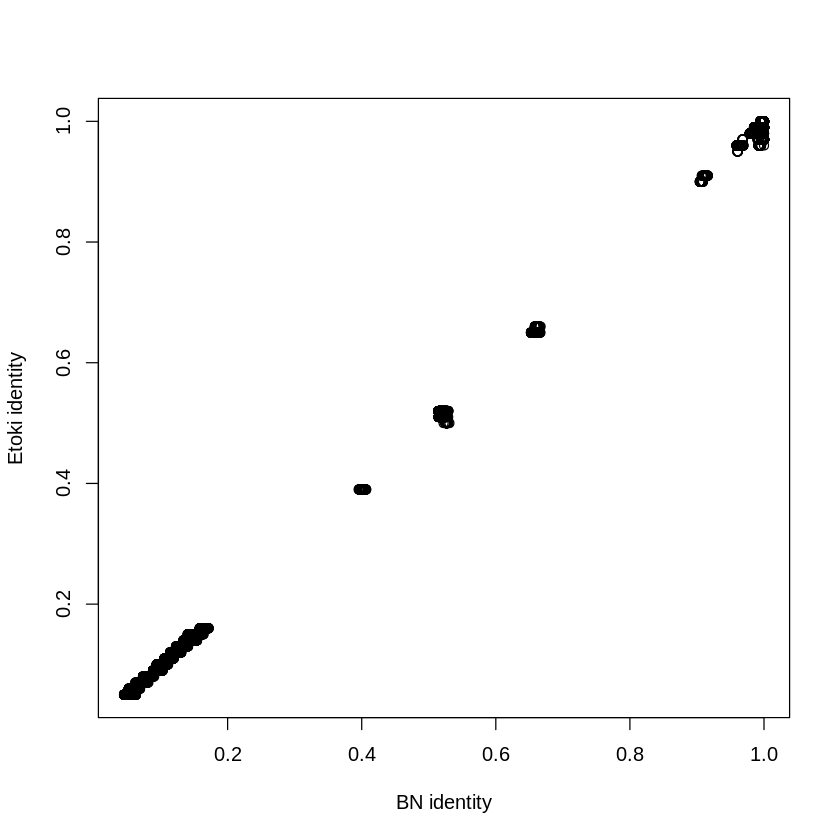

In [5]:
plot(filtered$identity.bn, filtered$identity.etoki, xlab="BN identity", ylab="Etoki identity", col="black")

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



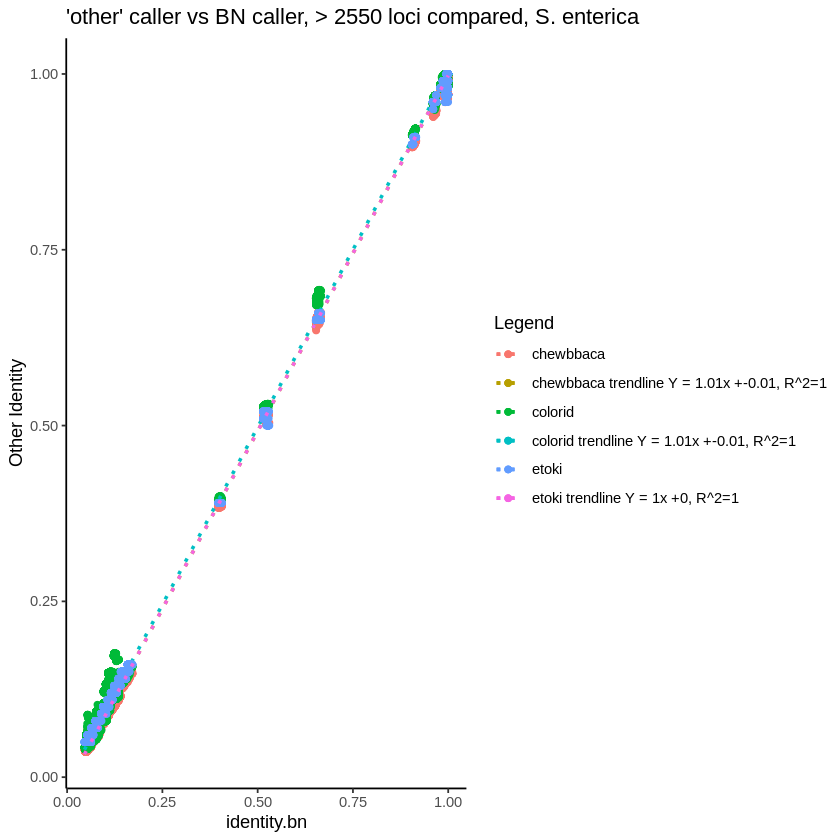

In [7]:
library("ggplot2")
lm_etoki  <- lm(filtered$identity.etoki ~ filtered$identity.bn)
rs_etoki  <- summary(lm_etoki)$r.squared
cc_etoki  <- lm_etoki$coefficients
eqn_etoki <- paste("Y = ", round(cc_etoki[-1],2), "x +", round(cc_etoki[1],2), ", R^2=",round(rs_etoki,2), sep="")

lm_chewbbaca  <- lm(filtered$identity.chewbbaca ~ filtered$identity.bn)
rs_chewbbaca  <- summary(lm_chewbbaca)$r.squared
cc_chewbbaca  <- lm_chewbbaca$coefficients
eqn_chewbbaca <- paste("Y = ", round(cc_chewbbaca[-1],2), "x +", round(cc_chewbbaca[1],2),", R^2=",round(rs_chewbbaca,2), sep="")

lm_colorid  <- lm(filtered$identity.colorid ~ filtered$identity.bn)
rs_colorid  <- summary(lm_colorid)$r.squared
cc_colorid  <- lm_colorid$coefficients
eqn_colorid <- paste("Y = ", round(cc_colorid[-1],2), "x +", round(cc_colorid[1],2),", R^2=",round(rs_colorid,2), sep="")

ggplot(filtered, aes(x=identity.bn)) +
  theme_classic() + 
  ggtitle(
    paste("'other' caller vs BN caller, > ",floor(minLoci)," loci compared, S. enterica", sep="")
  ) +
  geom_point(aes(y=identity.chewbbaca, color="chewbbaca")) +
  geom_smooth(data=filtered, aes(x=identity.bn, y=identity.chewbbaca, color=paste("chewbbaca trendline",eqn_chewbbaca)), method="lm", se=FALSE, linetype="dotted") +
  geom_point(aes(y=identity.colorid, color="colorid")) +
  geom_smooth(data=filtered, aes(x=identity.bn, y=identity.colorid, color=paste("colorid trendline",eqn_colorid)), method="lm", se=FALSE, linetype="dotted") +
  geom_point(aes(y=identity.etoki, color="etoki")) +
  geom_smooth(data=filtered, aes(x=identity.bn, y=identity.chewbbaca, color=paste("etoki trendline",eqn_etoki)), method="lm", se=FALSE, linetype="dotted") +
  labs(y = "Other Identity", color = "Legend") 
